# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [3]:
cities


['gornopravdinsk',
 'east london',
 'grand river south east',
 'alta floresta',
 'severobaykalsk',
 'port elizabeth',
 'payakumbuh',
 'mount isa',
 'nueva imperial',
 'beaumont',
 'ilulissat',
 'coahuayana',
 'luderitz',
 'alofi',
 'fairmont',
 'snyder',
 'punta arenas',
 'pacific grove',
 'mastic beach',
 'san jose',
 'rungata',
 'khonuu',
 'saskylakh',
 'bluff',
 'santa rosa',
 'cape town',
 'khatanga',
 'nanortalik',
 'sehithwa',
 'new norfolk',
 'longyearbyen',
 'husavik',
 'esperance',
 'rikitea',
 'mataura',
 'lalmohan',
 'albany',
 'buqayq',
 'araouane',
 'acapulco',
 'busselton',
 'hobart',
 'lac du bonnet',
 'alyangula',
 'dien bien',
 'kapaa',
 'amderma',
 'guerrero negro',
 'sentyabrskiy',
 'wagar',
 'atuona',
 'georgetown',
 'thompson',
 'caravelas',
 'nanakuli',
 'salina cruz',
 'pilao arcado',
 'barentsburg',
 'amuntai',
 'wenchi',
 'ryotsu',
 'chuy',
 'salalah',
 'uglekamensk',
 'tak',
 'korla',
 'koumac',
 'tuktoyaktuk',
 'saint-avold',
 'tumannyy',
 'avarua',
 'butarit

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
query_url = "http://api.openweathermap.org/data/2.5/weather?appid=ff12f134f1a59b9bab3ac57c83d90f2b&q=portland"
weather_response = requests.get(query_url).json()
pprint(weather_response)

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 45.52, 'lon': -122.68},
 'dt': 1604356202,
 'id': 5746545,
 'main': {'feels_like': 287.68,
          'humidity': 39,
          'pressure': 1018,
          'temp': 291.79,
          'temp_max': 293.15,
          'temp_min': 290.37},
 'name': 'Portland',
 'sys': {'country': 'US',
         'id': 5321,
         'sunrise': 1604328748,
         'sunset': 1604364960,
         'type': 1},
 'timezone': -28800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 90, 'speed': 4.1}}


In [5]:
#smallcities = ["portland","houston","seattle","new york","london","sydney","moose factory"]

updated_cities=[]
lat = []
lng = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&q="

#for each city in cities, grab the city, lat, lng, max temp, humidity, cloudiness,
    #wind speed, country, date & add to DF
row=1

for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])    
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        updated_cities.append(city)
        print(f"Now pulling data for #{row}, {city}")
    
    except KeyError:
        print(f"unable to process #{row}, {city}")
    row = row+1

print(f"--------------------")    
print(f"All finished. {len(lat)} cities had info pulled")



    
    



Now pulling data for #1, gornopravdinsk
Now pulling data for #2, east london
unable to process #3, grand river south east
Now pulling data for #4, alta floresta
Now pulling data for #5, severobaykalsk
Now pulling data for #6, port elizabeth
Now pulling data for #7, payakumbuh
Now pulling data for #8, mount isa
Now pulling data for #9, nueva imperial
Now pulling data for #10, beaumont
Now pulling data for #11, ilulissat
Now pulling data for #12, coahuayana
Now pulling data for #13, luderitz
Now pulling data for #14, alofi
Now pulling data for #15, fairmont
Now pulling data for #16, snyder
Now pulling data for #17, punta arenas
Now pulling data for #18, pacific grove
Now pulling data for #19, mastic beach
Now pulling data for #20, san jose
unable to process #21, rungata
unable to process #22, khonuu
Now pulling data for #23, saskylakh
Now pulling data for #24, bluff
Now pulling data for #25, santa rosa
Now pulling data for #26, cape town
Now pulling data for #27, khatanga
Now pulling dat

Now pulling data for #231, norman wells
Now pulling data for #232, tandlianwala
Now pulling data for #233, sakakah
Now pulling data for #234, kahului
Now pulling data for #235, greystones
Now pulling data for #236, bathsheba
Now pulling data for #237, bubaque
Now pulling data for #238, bajil
Now pulling data for #239, yulara
Now pulling data for #240, priiskovyy
Now pulling data for #241, daru
Now pulling data for #242, bansgaon
Now pulling data for #243, comodoro rivadavia
Now pulling data for #244, kruisfontein
Now pulling data for #245, cherskiy
unable to process #246, utiroa
Now pulling data for #247, ambilobe
unable to process #248, nizhneyansk
Now pulling data for #249, merauke
Now pulling data for #250, sinop
Now pulling data for #251, magomeni
Now pulling data for #252, sao filipe
Now pulling data for #253, boa vista
Now pulling data for #254, mustafakemalpasa
Now pulling data for #255, iqaluit
Now pulling data for #256, ostrovnoy
Now pulling data for #257, kavieng
Now pulling 

unable to process #459, hallingby
Now pulling data for #460, praya
Now pulling data for #461, bilma
unable to process #462, labutta
Now pulling data for #463, arkhara
Now pulling data for #464, chapais
Now pulling data for #465, kirillov
Now pulling data for #466, mae hong son
Now pulling data for #467, pemba
Now pulling data for #468, andenes
Now pulling data for #469, grand gaube
unable to process #470, cumaribo
Now pulling data for #471, veraval
Now pulling data for #472, kailua
Now pulling data for #473, nabire
unable to process #474, tocantinopolis
Now pulling data for #475, tura
Now pulling data for #476, roma
Now pulling data for #477, sharhorod
unable to process #478, burica
Now pulling data for #479, salinas
Now pulling data for #480, hays
Now pulling data for #481, dalvik
Now pulling data for #482, bengkulu
Now pulling data for #483, foz do iguacu
Now pulling data for #484, havre-saint-pierre
unable to process #485, grand centre
Now pulling data for #486, storsteinnes
unable 

In [6]:
len(lat)

564

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
city_dict = {"city":updated_cities,
                 "lat":lat,
                 "lng":lng,
                 "max temp(f)":maxtemp,
                 "humidity(%)":humidity,
                 "cloudiness(%)":cloudiness,
                 "wind speed(mph)":windspeed,
                 "country":country,
                 "date":date}

cities_df=pd.DataFrame(city_dict)
cities_df.to_csv('../Resources/Cities.csv')
cities_df.head()

,city,lat,lng,max temp(f),humidity(%),cloudiness(%),wind speed(mph),country,date
0,gornopravdinsk,60.05,69.90,268.76,98,93,2.34,RU,1604356382
1,east london,-33.02,27.91,292.55,84,69,6.07,ZA,1604356382
2,alta floresta,-9.88,-56.09,295.88,91,100,0.88,BR,1604356383
3,severobaykalsk,55.65,109.32,265.45,88,100,0.83,RU,1604356383
4,port elizabeth,-33.92,25.57,291.15,88,0,7.20,ZA,1604356383


In [14]:
cities_df.describe()

,lat,lng,max temp(f),humidity(%),cloudiness(%),wind speed(mph),date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,20.443511,18.223351,287.849539,71.292553,52.349291,3.749362,1.604356e+09
std,32.513703,90.246490,12.505176,21.353105,38.811339,2.857569,7.643433e+01
min,-54.800000,-175.200000,248.620000,8.000000,0.000000,0.120000,1.604356e+09
25%,-7.972500,-59.452500,279.350000,59.000000,7.000000,1.557500,1.604356e+09
50%,24.030000,24.300000,291.700000,77.000000,59.500000,3.100000,1.604356e+09
75%,47.107500,101.825000,298.150000,87.000000,90.000000,5.100000,1.604356e+09
max,78.220000,179.320000,306.150000,100.000000,100.000000,20.600000,1.604357e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
for index, row in cities_df.iterrows():
    if row["humidity(%)"]>100:
        city=row["city"]
        print(f"{city} is too humid")
        
        
#my current data doesn't have any cities with humidity >100%
        
print(f"all done checking humidity for {len(cities_df)} cities")

all done checking humidity for 564 cities


In [17]:
#  Get the indices of cities that have humidity over 100%.
too_humid = []
for index, row in cities_df.iterrows():
    if row["humidity(%)"]>100:
        city=row["city"]
        print(f"{city} is too humid")
        too_humid.append(cities_df.loc[index])
        
print(f"all done checking humidity for {len(cities_df)} cities")
print(too_humid)

all done checking humidity for 564 cities
[]


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#skipping since no cities have humidity greater than 100%. May come back later just to mess around with.

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

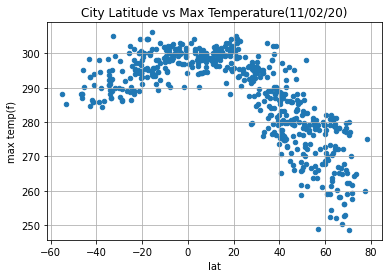

In [20]:
#Y is Max Temperature(F), X is Latitude
#Title: City Latitude vs Max Temperature(11/02/20)
cities_df.plot(kind="scatter",x="lat",y="max temp(f)", grid=True,
               title = "City Latitude vs Max Temperature(11/02/20)")

plt.savefig("Images/lat_vs_maxtemp.png")
plt.show()

## Latitude vs. Humidity Plot

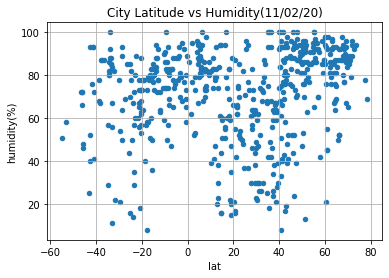

In [21]:
#Y is Humidity(%), X is Latitude
#Title: City Latitude vs Humidity(11/02/20)
cities_df.plot(kind="scatter",x="lat",y="humidity(%)", grid=True,
               title = "City Latitude vs Humidity(11/02/20)")

plt.savefig("Images/lat_vs_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

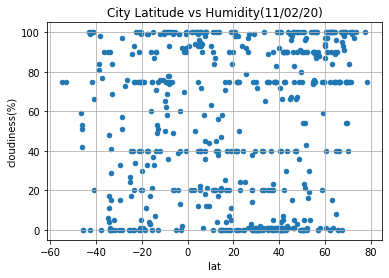

In [22]:
#Y is Cloudiness(%), X is Latitude
#Title: City Latitude vs Cloudiness(11/02/20)
cities_df.plot(kind="scatter",x="lat",y="cloudiness(%)", grid=True,
               title = "City Latitude vs Humidity(11/02/20)")

plt.savefig("Images/lat_vs_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

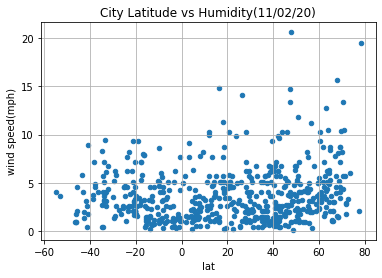

In [24]:
#Y is Wind Speed(mph), X is Latitude
#Title: City Latitude vs Wind Speed(11/02/20)
cities_df.plot(kind="scatter",x="lat",y="wind speed(mph)", grid=True,
               title = "City Latitude vs Humidity(11/02/20)")

plt.savefig("Images/lat_vs_windspeed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.841123948417022


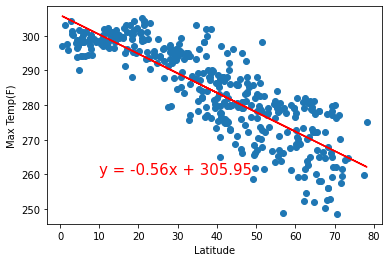

In [40]:
#Y is Max Temp, X is Latitude >=0
#The r-value is: rvalue
n_hem = cities_df.loc[cities_df["lat"]>=0,:]
x_values=n_hem["lat"]
y_values=n_hem["max temp(f)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,260),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp(F)')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/NHlat_vs_tempLR.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6178520437746984


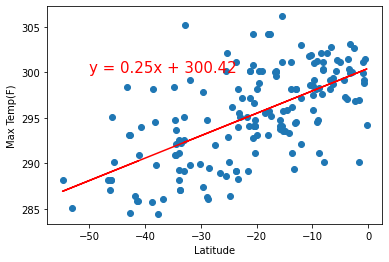

In [41]:
#Y is Max Temp, X is Latitude <=0
#The r-value is: rvalue
s_hem = cities_df.loc[cities_df["lat"]<=0,:]
x_values=s_hem["lat"]
y_values=s_hem["max temp(f)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,300),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp(F)')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/SHlat_vs_tempLR.png")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.21808772682795657


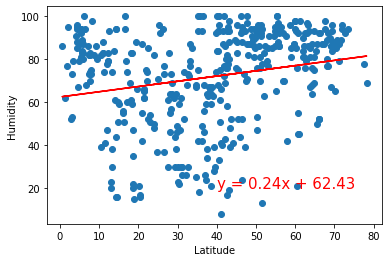

In [45]:
x_values=n_hem["lat"]
y_values=n_hem["humidity(%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/NHlat_vs_humidityLR.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2195797238408014


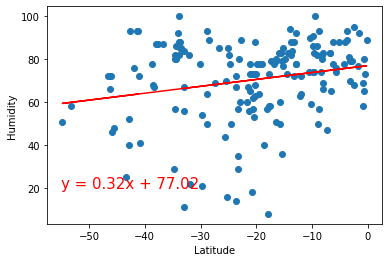

In [47]:
x_values=s_hem["lat"]
y_values=s_hem["humidity(%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/SHlat_vs_humidityLR.png")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.17420502629462542


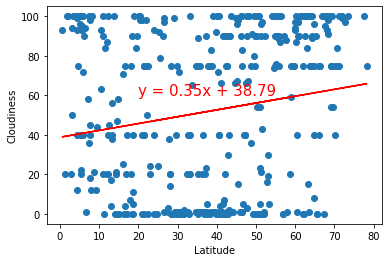

In [51]:
x_values=n_hem["lat"]
y_values=n_hem["cloudiness(%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/NHlat_vs_cloudinessLR.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.18137677703689403


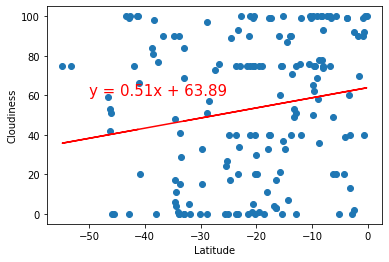

In [53]:
x_values=s_hem["lat"]
y_values=s_hem["cloudiness(%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/SHlat_vs_cloudinessLR.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.19537364761576786


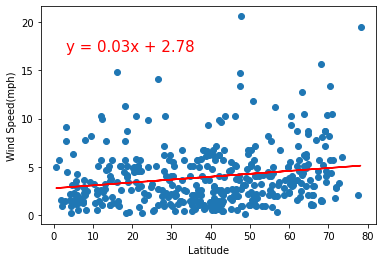

In [55]:
x_values=n_hem["lat"]
y_values=n_hem["wind speed(mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,17),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/NHlat_vs_windspeedLR.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.17136109366971622


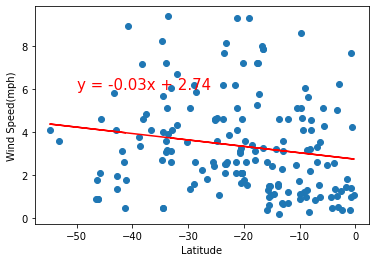

In [57]:
x_values=s_hem["lat"]
y_values=s_hem["wind speed(mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,6),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/SHlat_vs_windspeedLR.png")
plt.show()